# Tarea 3
## Pablo Barranco Soto
## 151528

Utilizando los datos de clientes de un centro comercial generarás clusters a través del algoritmo de K-means.

Utilizando un random seed de 20201122:

In [1]:
# Importamos paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import scale 
from sklearn.cluster import KMeans 

# Fijamos la Semilla
np.random.seed(20201122)

In [2]:
# Importamos nuestros datos
data = pd.read_csv('data/Mall_Customers.csv')

# Damos formato al dataset
data.rename(columns={col: col.lower() for col in data.columns.values}, inplace=True)
data.rename(columns={col: col.replace(' ','_').replace('/','_') for col in data.columns.values}, inplace=True)
data.rename(columns={'annual_income_(k$)': 'annual_income', 'spending_score_(1-100)': 'spending_score'},inplace = True)

## 1. Convierte la columna gender a binaria cambiando male a 0 y female a 1.

In [3]:
data.gender.mask(data.gender == 'Female', 1, inplace=True)
data.gender.mask(data.gender == 'Male', 0, inplace=True)
data.head()

,customerid,gender,age,annual_income,spending_score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


## 2. Escala los datos de edad, salario y el score de gasto con el método scale de sckikit-learn.

In [4]:
data.drop(['customerid','gender'],axis=1,inplace = True)
data_scaled = scale(data)
data_scaled[1:5]

array([[-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

## 3. Genera clusters utilizando k-means con la siguiente configuración de hiperparámetros:
* ### Grupos: 3,4,5,6,7,8,9,10,13
* ### Máximo de iteraciones: 50

In [5]:
sse = []
K = range(3,14)

for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

### 4. Genera una gráfica de codo e indica cuál es el número de grupos óptimos

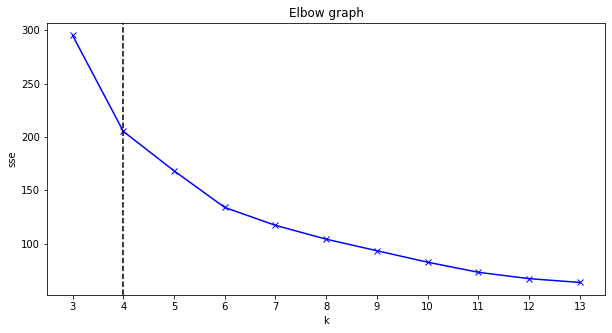

In [6]:
# seleccionamos una k
k = 4

plt.figure(figsize=(10,5))
plt.plot(np.arange(3,14), sse, 'bx-')
plt.axvline(x = k,color= 'k',linestyle = '--')
plt.xticks([3,4,5,6,7,8,9,10,11,12,13])
plt.xlabel('k')
plt.ylabel("sse")
plt.title("Elbow graph")
plt.show()

A mi parecer el optimo se encuentra en k = 5, aunque es dificil ver pues parece no haber un codo definido.

In [7]:
kmeans = KMeans(n_clusters=k, max_iter=50)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 5. Cuántos elementos tiene cada grupo

In [8]:
labels = kmeans.labels_
data['group'] = labels

In [9]:
data.groupby(['group'])['age']\
.count()\
.reset_index()\
.rename(columns={'age': 'count'})

,group,count
0,0,65
1,1,40
2,2,57
3,3,38


### 6. Cuáles son los centroides de cada grupo

In [10]:
centroids = kmeans.cluster_centers_
centroids

array([[ 1.08616125, -0.49056525, -0.39717443],
       [-0.42880597,  0.97484722,  1.21608539],
       [-0.96249203, -0.78476346,  0.39202966],
       [ 0.03720536,  0.99011499, -1.18875705]])

* Grupo 0 $[ 1.20, -0.23, -0.05]$
* Grupo 1 $[-0.42,  0.97,  1.21]$
* Grupo 2 $[0.07,  0.97, -1.19]$
* Grupo 3 $[-0.98, -0.74, 0.46]$
* Grupo 4 $[-0.53 , -1.29, -1.23]$

### 7. Cuántas iteraciones utilizó el algoritmo

In [11]:
kmeans.n_iter_

8

### 8. Grafica en la escala original de los datos el salario y el score de gasto utilizando un color por cada grupo e incluyendo los centroides.

In [12]:

# age
m_1 = data.age.mean()
s_1 = data.age.std()

# annual_income
m_2 = data.annual_income.mean()
s_2 = data.annual_income.std()

# spending_score
m_3 = data.spending_score.mean()
s_3 = data.spending_score.std()


centroids_unescaled = pd.DataFrame({'age': centroids[:,0]*s_1 + m_1,
                                    'annual_income': centroids[:,1]*s_2 + m_2,
                                    'spending_score':centroids[:,2]*s_3 + m_3,
                                    'group': np.repeat('C',k)})

all_data = data.append(centroids_unescaled)

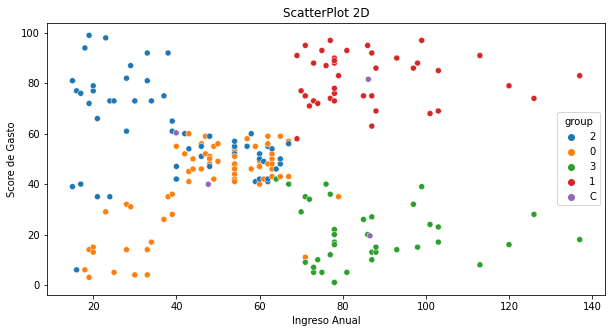

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='annual_income', y='spending_score', hue="group" ,data=all_data)
plt.xlabel('Ingreso Anual')
plt.ylabel('Score de Gasto')
plt.title('ScatterPlot 2D')
plt.show()

La visualización presentada a continuacion se hizo por curiosidad.

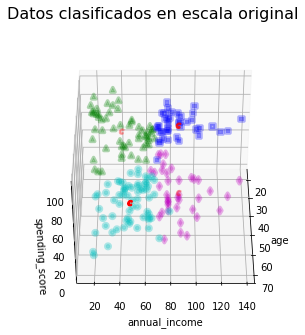

In [14]:
# Grafica en 3D
fig = plt.figure(figsize=(10,5))
fig.canvas.set_window_title('ScatterPlot K_means')
fig.suptitle('Datos clasificados en escala original', fontsize=16)
ax = fig.add_subplot(111, projection = '3d')


# grupo 1
x_1 = data.loc[data['group'] == 0,'age']
y_1 = data.loc[data['group'] == 0,'annual_income']
z_1 = data.loc[data['group'] == 0,'spending_score']

# grupo 2
x_2 = data.loc[data['group'] == 1,'age']
y_2 = data.loc[data['group'] == 1,'annual_income']
z_2 = data.loc[data['group'] == 1,'spending_score']

# grupo 3
x_3 = data.loc[data['group'] == 2,'age']
y_3 = data.loc[data['group'] == 2,'annual_income']
z_3= data.loc[data['group'] == 2,'spending_score']

# grupo 4
x_4 = data.loc[data['group'] == 3,'age']
y_4 = data.loc[data['group'] == 3,'annual_income']
z_4 = data.loc[data['group'] == 3,'spending_score']

# grupo 5
x_5 = data.loc[data['group'] == 4,'age']
y_5 = data.loc[data['group'] == 4,'annual_income']
z_5 = data.loc[data['group'] == 4,'spending_score']

# centroides
x_6 = all_data.loc[all_data['group'] == 'C','age']
y_6 = all_data.loc[all_data['group'] == 'C','annual_income']
z_6 = all_data.loc[all_data['group'] == 'C','spending_score']


ax.set_xlabel("age")
ax.set_ylabel("annual_income")
ax.set_zlabel("spending_score")


ax.scatter(x_1, y_1, z_1, c='c', marker='o', alpha = 0.3 , linewidths = 3.5)
ax.scatter(x_2, y_2, z_2, c='b', marker='s', alpha = 0.3 , linewidths = 3.5)
ax.scatter(x_3, y_3, z_3, c='g', marker='^', alpha = 0.3 , linewidths = 3.5)
ax.scatter(x_4, y_4, z_4, c='m', marker='d', alpha = 0.3 , linewidths = 3.5)
ax.scatter(x_5, y_5, z_5, c='k', marker='*', alpha = 0.3 , linewidths = 3.5)
ax.scatter(x_6, y_6, z_6, c='r', marker= '$c$', linewidths = 2)
ax.view_init(40, 0)



In [15]:

# Display grafica en 3D dinamica

%matplotlib qt

fig = plt.figure(figsize=(10,5))
fig.canvas.set_window_title('ScatterPlot K_means')
fig.suptitle('Datos clasificados en escala original', fontsize=16)

ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("age")
ax.set_ylabel("annual_income")
ax.set_zlabel("spending_score")
ax.scatter(x_1, y_1, z_1, c='c', marker='o', alpha = 0.3 , linewidths = 3.5)
ax.scatter(x_2, y_2, z_2, c='b', marker='s', alpha = 0.3 , linewidths = 3.5)
ax.scatter(x_3, y_3, z_3, c='g', marker='^', alpha = 0.3 , linewidths = 3.5)
ax.scatter(x_4, y_4, z_4, c='m', marker='d', alpha = 0.3 , linewidths = 3.5)
ax.scatter(x_5, y_5, z_5, c='k', marker='*', alpha = 0.3 , linewidths = 3.5)
ax.scatter(x_6, y_6, z_6, c='r', marker= '$c$', linewidths = 2)
ax.view_init(20, 45)

plt.show()

### 9. Genera un describe a cada grupo, ¿cuáles son las 3 características más importantes de cada grupo con respecto a las variables con las que realizamos los grupos?

>  * #### Grupo 0

In [16]:
data[data['group'] == 0].describe()

,age,annual_income,spending_score,group
count,65.000000,65.000000,65.000000,65.0
mean,53.984615,47.707692,39.969231,0.0
std,9.418221,14.648723,16.405953,0.0
min,35.000000,18.000000,3.000000,0.0
25%,48.000000,39.000000,32.000000,0.0
50%,52.000000,49.000000,46.000000,0.0
75%,63.000000,60.000000,51.000000,0.0
max,70.000000,79.000000,60.000000,0.0


* $\textit{media }(\text{age, annual_income, spending_score}) = [39.87,86.10,19.35]$ resulta ser el centroide del grupo 0
* $\textit{std }(\text{age, annual_income, spending_score}) = [10.93,16.72,11.61]$ con lo cual vemos que su mayor disperción es con respecto a la variable _ingreso mensual_.
* $\textit{min}(\text{spending_score}) = 1$, resulta ser el menor del dataset, con lo cual podemos pensar que es el grupo asociado al menor gasto.

> * #### Grupo 1

In [17]:
data[data['group'] == 1].describe()

,age,annual_income,spending_score,group
count,40.000000,40.000000,40.000000,40.0
mean,32.875000,86.100000,81.525000,1.0
std,3.857643,16.339036,9.999968,0.0
min,27.000000,69.000000,58.000000,1.0
25%,30.000000,74.750000,74.000000,1.0
50%,32.000000,78.500000,83.000000,1.0
75%,36.000000,94.000000,90.000000,1.0
max,40.000000,137.000000,97.000000,1.0


* $\textit{Media }(\text{age, annual_income, spending_score}) = [25.18,41.09,62.24]$ resulta ser el centroide del grupo 1
* $\textit{std }(\text{age, annual_income, spending_score}) = [5.50,16.81,16.59]$ con lo cual podemos pensar que es un grupo con poca variacion en la edad que ronda los 25 años. Y donde es mas disperso es en el ingreso anual y su score de gasto.
* $\textit{count}(\text{group}_1) = 54$ con lo cual vemos que es el grupo con mayor población.

> * #### Grupo 2

In [18]:
data[data['group'] == 2].describe()

,age,annual_income,spending_score,group
count,57.000000,57.000000,57.000000,57.0
mean,25.438596,40.000000,60.298246,2.0
std,5.707193,17.031483,18.434212,0.0
min,18.000000,15.000000,6.000000,2.0
25%,21.000000,24.000000,48.000000,2.0
50%,24.000000,40.000000,56.000000,2.0
75%,31.000000,57.000000,73.000000,2.0
max,38.000000,67.000000,99.000000,2.0


* $\textit{Media }(\text{age, annual_income, spending_score}) = [55.63,54.38,48.85]$ resulta ser el centroide del grupo 2
* $\textit{std }(\text{age, annual_income, spending_score}) = [8.91,8.81,6.30]$ con lo cual podemos pensar que es un compacto.
* $\textit{max}(\text{age}) = 70$, siendo el dato mas viejo del data set, con lo cual podriamos pensar que es un grupo categorizado por edad adulta.

> * #### Grupo 3

In [19]:
data[data['group'] == 3].describe()

,age,annual_income,spending_score,group
count,38.000000,38.000000,38.000000,38.0
mean,39.368421,86.500000,19.578947,3.0
std,10.617225,16.761845,11.684204,0.0
min,19.000000,64.000000,1.000000,3.0
25%,34.000000,75.250000,10.500000,3.0
50%,40.500000,79.500000,17.000000,3.0
75%,46.750000,96.000000,27.750000,3.0
max,59.000000,137.000000,42.000000,3.0


* $\textit{Media }(\text{age, annual_income, spending_score}) = [32.87,86.10,81.52]$ resulta ser el centroide del grupo 3
* $\textit{std }(\text{age, annual_income, spending_score}) = [3.85,16.33,9.99]$ con lo cual podemos pensar que es un grupo con poca variación en la edad pero alta en ingreso anual y score de gasto.
* $\textit{max}(\text{annual_income}) = 137$, siendo el dato con mayor ingreso anual del data set, con lo cual podriamos pensar que es un grupo categorizado por alto ingreso mensual.

> * ### Grupo 4

In [20]:
data[data['group'] == 4].describe()

,age,annual_income,spending_score,group
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


* $\textit{Media }(\text{age, annual_income, spending_score}) = [46.25,26.75,18.35]$ resulta ser el centroide del grupo 4
* $\textit{std }(\text{age, annual_income, spending_score}) = [11.57,7.31,11.93]$ con lo cual podemos pensar que es un grupo en general compacto y simetrico en los ejes de edad y score de gasto.
* $\textit{count}(\text{group}_4) = 20$ con lo cual vemos que es el grupo con menor población.